<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/15_FastFourierTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Fast Fourier Transform</h1>

Remind about DFT,

Minitalk about Goertzel Algorithm, and make the Goertzel Algorithm

Talk much about FFT

Explore FFT Program in numpy


exam will solve 16 point DFT/FFT
Decomposition


In [ ]:
import numpy as np
import time

# Size of the DFT
# N = 1024
N = pow(2,13)#2^20

# Create a sample input signal (random complex numbers)
x = np.random.random(N) + 1j * np.random.random(N)



# Start timing the DFT computation
start_time = time.time()
# DFT matrix generation
W_N = np.exp(-2j * np.pi * np.arange(N) / N)
dft_matrix = np.array([[W_N[(k*n) % N] for n in range(N)] for k in range(N)])
# Perform DFT using matrix multiplication
X = np.dot(dft_matrix, x)

# End timing the DFT computation
end_time = time.time()

# Time taken for the computation
time_taken = end_time - start_time
time_taken


27.45440697669983

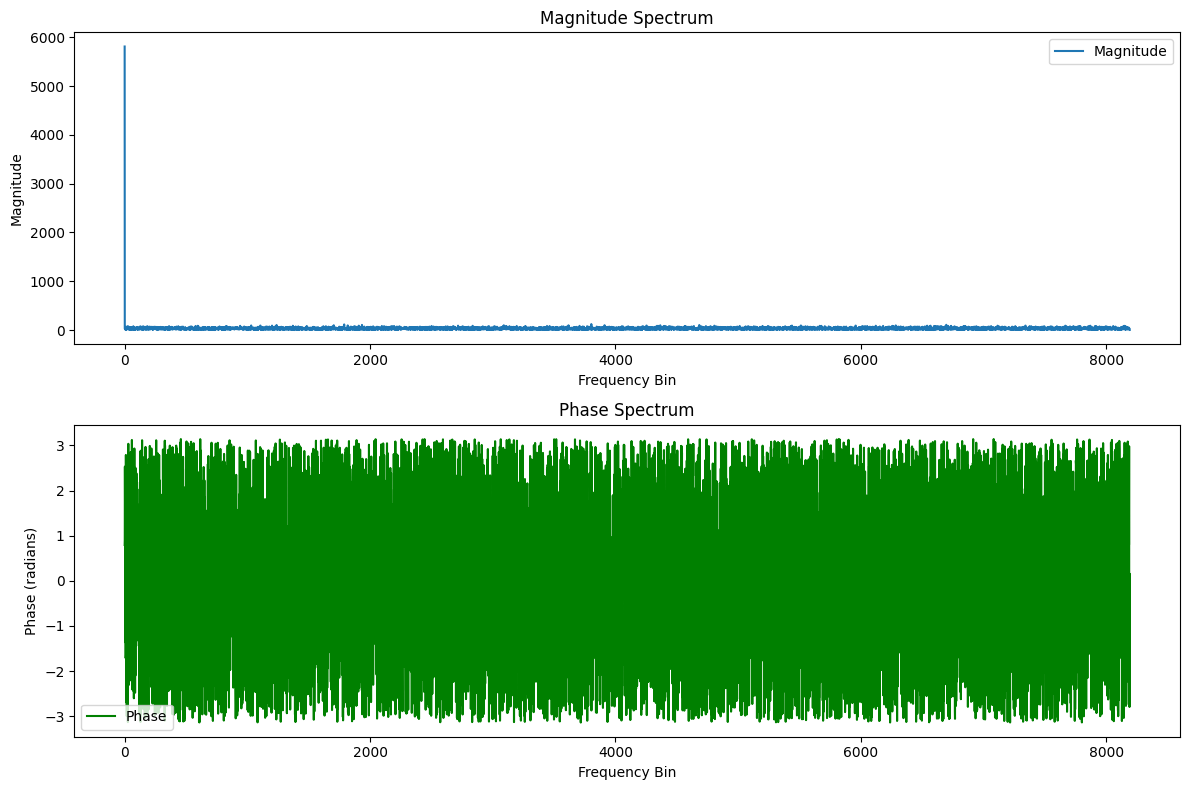

In [ ]:
import matplotlib.pyplot as plt

# Calculate magnitude and phase of the DFT result
magnitude = np.abs(X)
phase = np.angle(X)

# Create figure and axes for the plots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plotting the magnitude spectrum
axs[0].plot(magnitude, label='Magnitude')
axs[0].set_title('Magnitude Spectrum')
axs[0].set_xlabel('Frequency Bin')
axs[0].set_ylabel('Magnitude')
axs[0].legend()

# Plotting the phase spectrum
axs[1].plot(phase, label='Phase', color='green')
axs[1].set_title('Phase Spectrum')
axs[1].set_xlabel('Frequency Bin')
axs[1].set_ylabel('Phase (radians)')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import time

# Size of the DFT
# N = 1024
# N = 2^10


# Create a sample input signal (random complex numbers)
x = np.random.random(N) + 1j * np.random.random(N)

# DFT matrix generation
W_N = np.exp(-2j * np.pi * np.arange(N) / N)
dft_matrix = np.array([[W_N[(k*n) % N] for n in range(N)] for k in range(N)])

# Perform DFT using matrix multiplication
X = np.dot(dft_matrix, x)

# Implementing the Goertzel algorithm for a specific frequency
def goertzel(x, k, N):
    # Constants for the Goertzel algorithm
    omega = (2 * np.pi * k) / N
    coeff = 2 * np.cos(omega)

    # Initial conditions
    s_prev = 0
    s_prev2 = 0

    # Main loop
    for n in x:
        s = n + coeff * s_prev - s_prev2
        s_prev2 = s_prev
        s_prev = s

    # Calculate the real and imaginary parts of the k-th DFT coefficient
    real = s_prev - s_prev2 * np.cos(omega)
    imag = s_prev2 * np.sin(omega)

    return real + 1j * imag

# Frequency bin to use for Goertzel (let's use the peak frequency from previous DFT result)
k_peak = np.argmax(np.abs(X))

# Start timing the Goertzel computation
start_time_goertzel = time.time()

# Perform Goertzel algorithm for the peak frequency
Xk_goertzel = goertzel(x, k_peak, N)

# End timing the Goertzel computation
end_time_goertzel = time.time()

# Time taken for the Goertzel computation
time_taken_goertzel = end_time_goertzel - start_time_goertzel

# Compare the result from Goertzel with the full DFT at the same frequency
Xk_full_dft = X[k_peak]

# Error in magnitude and phase
error_magnitude = np.abs(Xk_full_dft) - np.abs(Xk_goertzel)
error_phase = np.angle(Xk_full_dft) - np.angle(Xk_goertzel)

time_taken_goertzel, error_magnitude, error_phase


(0.006039857864379883, 3.8598955143243074e-09, 4.610645198965813e-12)

In [ ]:
# Let's compare the computation times for the full DFT using matrix multiplication and the Goertzel algorithm for a single frequency

# Start timing the full DFT computation
start_time_full_dft = time.time()

# Perform full DFT using matrix multiplication
X_full = np.dot(dft_matrix, x)

# End timing the full DFT computation
end_time_full_dft = time.time()

# Time taken for the full DFT computation
time_taken_full_dft = end_time_full_dft - start_time_full_dft

# Start timing the Goertzel computation
start_time_goertzel = time.time()

# Perform Goertzel algorithm for the peak frequency
Xk_goertzel = goertzel(x, k_peak, N)

# End timing the Goertzel computation
end_time_goertzel = time.time()

# Time taken for the Goertzel computation
time_taken_goertzel = end_time_goertzel - start_time_goertzel

# Display the time comparisons
time_taken_full_dft, time_taken_goertzel


(0.08928799629211426, 0.006017446517944336)